In [ ]:
from google.colab import files

dataset_zip = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
!unzip dataset.zip 

Output streaming troncato alle ultime 5000 righe.
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_62.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_63.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_64.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_65.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_66.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_67.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_68.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_69.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_7.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_71.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_72.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_73.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_74.jpg  
  inflating: strive-mask-dataset/bad_mask/michal_bad_mask_75.jpg  
  inflating: 

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = 'strive-mask-dataset'

In [ ]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  3 classes:
 ['bad_mask', 'no_mask', 'mask']


In [ ]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: bad_mask


Class: no_mask


Class: mask


In [ ]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 5472 training images and 1367 validation images.


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

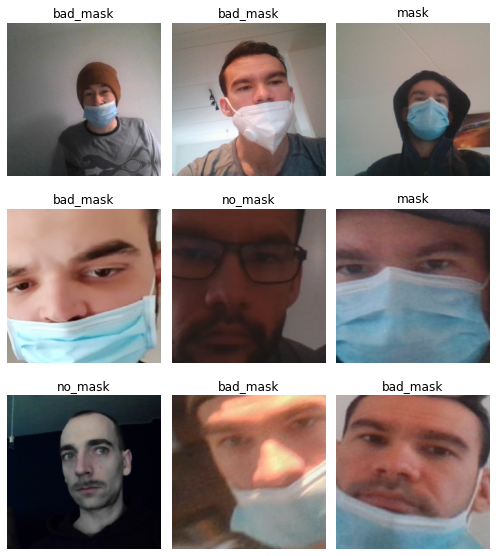

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


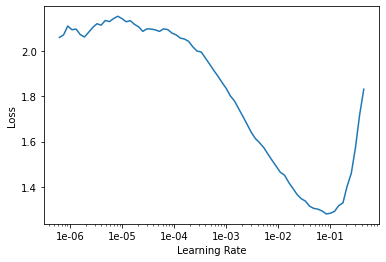

In [ ]:
learn.lr_find();
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,0.775266,0.781667,0.852963,03:39
1,0.562311,0.408214,0.907827,04:03
2,0.306423,0.100330,0.964887,04:01
3,0.178985,0.098051,0.962692,04:04


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default

In [29]:
learn.export('fastaimask.pkl')

In [18]:
ls

bad_mask.jpg  mask.jpg     sample_data/
dataset.zip   no_mask.jpg  strive-mask-dataset/
